In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Целевой переменной является вероятность приёма в университет — Chance of Admit (ranging from 0 to 1 )

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

2.11.1 Сколько всего абитуриентов в выборке?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [10]:
np.shape(df)[0]

500

Задание 2.11.2 Составьте корреляциюнную матрицу перечисленных признаков вместе с целевой переменной, исключив столбец Serial No.

In [6]:
df1 = df.drop(['Serial No.'], axis = 1)

In [7]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
corr_matrix = df1.corr(method = 'pearson')

In [9]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Задание 2.11.3 Какой признак сильнее всех скоррелирован с целевым параметром?

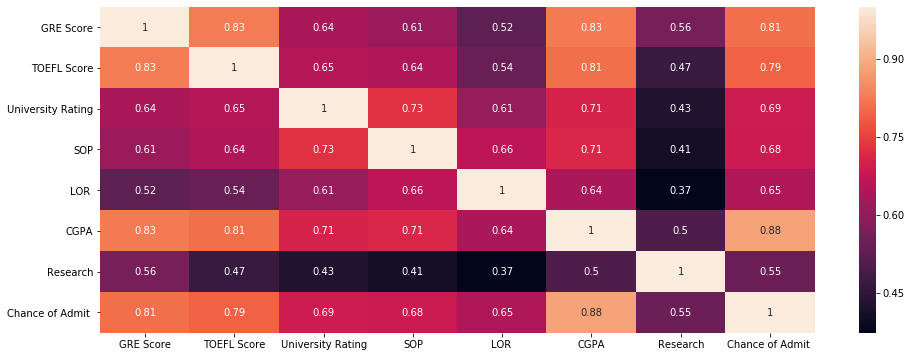

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(data=corr_matrix, annot=True)

Задание 2.11.4 Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0)

В каком случае признаки сильнее скоррелированы между собой?

In [18]:
df_1 = df1[df1['Research'] == 1]
df_0 = df1[df1['Research'] == 0]

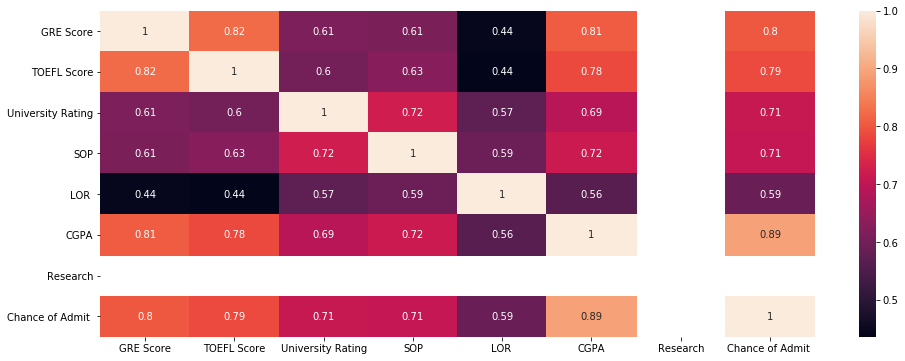

In [22]:
corr_matrix_1 = df_1.corr(method = 'pearson')
corr_matrix_1
plt.figure(figsize=(16,6))
sns.heatmap(data=corr_matrix_1, annot=True)

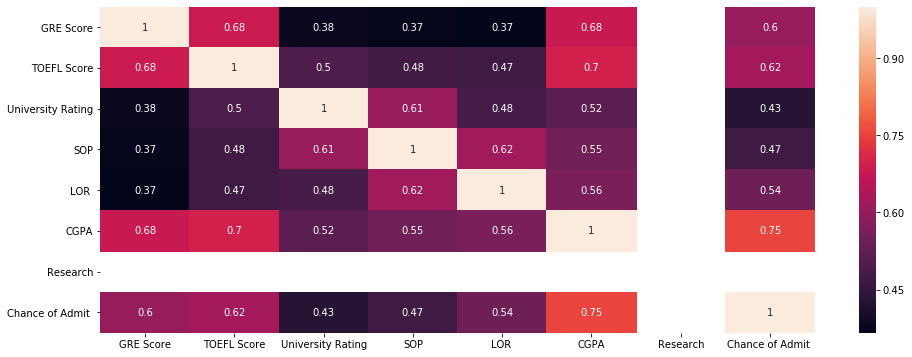

In [23]:
corr_matrix_0 = df_0.corr(method = 'pearson')
corr_matrix_0
plt.figure(figsize=(16,6))
sns.heatmap(data=corr_matrix_0, annot=True)

Задание 2.11.5
В случае, когда корреляции между данными меньше, какие признаки наиболее скоррелированы с целевой переменной?

In [24]:
# TOEFL Score, SOP  0.62/0.47
# GRE Score, CGPA   0.6/0.75
# TOEFL Score, CGPA 0.62/0.75

Задание 2.11.6
Постройте OLS регрессию Chance of Admission на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [37]:
df_0.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [38]:
y = df_0[['Chance of Admit ']]

In [39]:
TOEFL = df_0[['TOEFL Score']]
CGPA  = df_0[['CGPA']]

In [41]:
np.shape(df_0)

(220, 8)

In [42]:
df_0.shape

(220, 8)

In [52]:
w0 = np.ones(220)

In [56]:
w00 = w0.reshape(220,1)

In [58]:
w00.shape

(220, 1)

In [68]:
A = np.hstack([w00,TOEFL,CGPA])

In [69]:
A.shape

(220, 3)

In [71]:
G= A.T@A

In [73]:
G_inv = np.linalg.inv(G)

In [74]:
W = G_inv@A.T@y

In [80]:
W = np.array(W)

In [ ]:
np.linalg.lstsq(A,y)

Задание 2.11.7
Сделайте прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1, используя модель, полученную в задании 2.11.6 (используйте округленные значения признаков).

In [81]:
type(W)

numpy.ndarray

In [123]:
W

array([[-1.04486443],
       [ 0.00442727],
       [ 0.14807744]])

In [124]:
W[0]+W[1]*107+W[2]*9.1

array([0.77635853])

In [125]:
-1.045+0.004*107+0.148*9.1

0.7297999999999998

Задание 2.11.8
Аналогично заданию 2.11.6 постройте OLS регрессию Chance of Admission на выбранные в задании 2.11.5 признаки, однако теперь сперва стандартизируйте эти признаки.

In [126]:
TOEFL_centr = TOEFL-TOEFL.mean()

In [127]:
TOEFL_standart = TOEFL_centr/np.linalg.norm(TOEFL_centr)

In [128]:
CGPA_centr = CGPA-CGPA.mean()
CGPA_standart = CGPA_centr/np.linalg.norm(CGPA_centr)

In [129]:
A = np.hstack([TOEFL_standart,CGPA_standart])

In [130]:
G = A.T@A

In [131]:
G_inv = np.linalg.inv(G)

In [132]:
y_centr = y-y.mean()
y_standart = y_centr/np.linalg.norm(y_centr)

In [133]:
W_standart = G_inv@A.T@y_standart

In [134]:
W_standart_ar = np.array(W_standart)
W_standart_ar

array([[0.19044768],
       [0.62001517]])

In [135]:
new_1 = 107
new_2 = 9.1

In [141]:
new_1_st = np.array((new_1 -TOEFL.mean())/np.linalg.norm(TOEFL_centr))

In [142]:
new_1_st 

array([0.04223527])

In [143]:
new_2_st = np.array((new_2 - CGPA.mean())/np.linalg.norm(CGPA_centr))

In [144]:
otw = W_standart_ar[0]*new_1_st+W_standart_ar[1]*new_2_st

In [145]:
otw

array([0.08540446])

In [146]:
otw*np.linalg.norm(y_centr)+y.mean()

Chance of Admit     0.776359
dtype: float64